<a href="https://colab.research.google.com/github/choiboy92/ImperialML/blob/main/Tutorial%204/Tutorial4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scaling

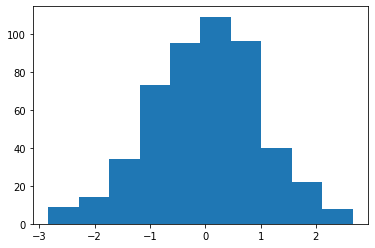

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

df = pandas.read_csv('http://pogo.software/me4ml/tensile_strength.csv')
t = np.array(df['Temperature (deg C)'][:])
s = np.array(df['Ultimate tensile strength (Pa)'][:])
t_mean = np.mean(t)
s_mean = np.mean(s)
t_std = np.std(t)
s_std = np.std(s)

t_scale = (t-t_mean)/t_std
s_scale = (s-s_mean)/s_std

fig, ax = plt.subplots()
plt.hist(s_scale)
#plt.hist(s)
plt.show()



In [2]:
scArray = np.array([[t_mean, s_mean], [t_std, s_std]])
np.savetxt('scaleParams.txt', scArray)

# download it from the Colab interface
#from google.colab import files
#files.download('scaleParams.txt')

loadedScales = np.loadtxt('scaleParams.txt')
#print(loadedScales)

## Plotting linear discriminant functions

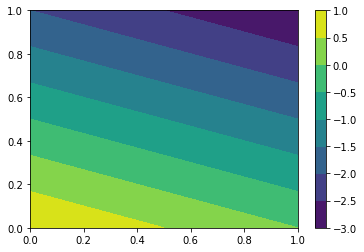

In [8]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

#weight = np.array([-1,-3]).T
weight = np.array([[-1],[-3]]).T
w0 = 1

x1line = np.linspace(0,1, 100)
x2line = np.linspace(0,1, 100)

x1grid, x2grid = np.meshgrid(x1line, x2line)

# produce an grid array with all grid values
xgrid = np.array([x1grid, x2grid]).reshape([2,100*100])

#print(weight.shape)
#print(xgrid.shape)
g = np.matmul(weight, xgrid) + w0

# how to calculate decision boundary line?

# plot contour
plt.contourf(x1line, x2line, g.reshape([100,100]))
plt.colorbar()
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

## Plotting classification areas

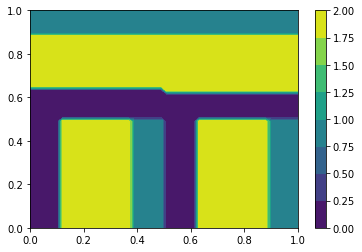

In [49]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

#weight terms each with shape (1, 3)
a1 = np.array([[1.3], [-1], [-3]]).T
a2 = np.array([[-2], [1], [2]]).T
a3 = np.array([[0.3], [0.1], [-0.1]]).T
a4 = np.array([[0], [-1], [1]]).T
a5 = np.array([[-0.2], [1.5], [-1]]).T

npx = 50
npy = 50
x1line = np.linspace(0, 1, npx)
x2line = np.linspace(0, 1, npy)

x1grid, x2grid = np.meshgrid(x1line, x2line)

# produce an grid array with all grid values
xgrid = np.array([x1grid, x2grid]).reshape([npx*npy, 2])

#Ygrid is defined as the same as Xgrid, except it has 1
#at the beginning − this therefore adds a column of ones to the left
Ygrid = np.concatenate([np.ones([npx * npy,1]), xgrid],axis=1)

#calculate each of the five functions as before
g1 = np.matmul(a1, Ygrid.T)
g2 = np.matmul(a2, Ygrid.T)
g3 = np.matmul(a3, Ygrid.T)
g4 = np.matmul(a4, Ygrid.T)
g5 = np.matmul(a5, Ygrid.T)

#combine all five functions together
gconc = np.concatenate([g1, g2, g3, g4, g5])

#find which of the columns is the largest
omega = np.argmax(gconc , axis=0)

#put back onto 2D grid so it can easily be plotted
omega = np.reshape(omega, [npx, npy])

# plot contour
plt.contourf(x1line, x2line, omega)
plt.colorbar()
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

(10000, 4)
(100, 100)
(10000, 4)


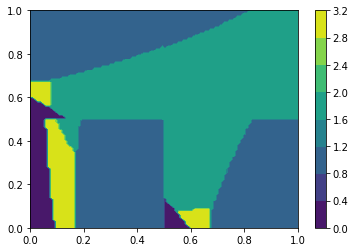

In [48]:
# Higher Order Functions

import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

#weight terms each with shape (1, 4)
a1 = np.array([[1.3], [-1], [-3], [-10]]).T
a2 = np.array([[-1], [1.5], [3], [-1]]).T
a3 = np.array([[0.4], [-0.1], [-0.1], [3]]).T
a4 = np.array([[0.5], [-1], [1], [-0.1]]).T
a5 = np.array([[-0.2], [1.5], [-1], [0.4]]).T

npx = 100
npy = 100
x1line = np.linspace(0, 1, npx)
x2line = np.linspace(0, 1, npy)

x1grid, x2grid = np.meshgrid(x1line, x2line)

# produce an grid array with all grid values
xgrid = np.array([x1grid, x2grid]).reshape([npx*npy, 2])

#calculate the x1*x2 (higher order) grid
x1x2 = x1grid * x2grid

#Ygrid is defined as the same as Xgrid, except it has 1
#at the beginning − this therefore adds a column of ones to the left
#at end, add the x1x2 column
Ygrid = np.concatenate([np.ones([npx * npy,1]), xgrid, x1x2.reshape([npx*npy, 1])], axis=1)

#calculate each of the five functions as before
g1 = np.matmul(a1, Ygrid.T)
g2 = np.matmul(a2, Ygrid.T)
g3 = np.matmul(a3, Ygrid.T)
g4 = np.matmul(a4, Ygrid.T)
g5 = np.matmul(a5, Ygrid.T)

#combine all five functions together
gconc = np.concatenate([g1, g2, g3, g4, g5])

#find which of the columns is the largest
omega = np.argmax(gconc , axis=0)

#put back onto 2D grid so it can easily be plotted
omega = np.reshape(omega, [npx, npy])

# plot contour
plt.contourf(x1line, x2line, omega)
plt.colorbar()
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()